In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('synthetic_interest_rate_data.csv')

# Inspect the first few rows
print(data.head())

# Check the summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check the data types
print(data.dtypes)


         Date  Interest_Rate  Stock_Index  GDP_Growth
0  2000-01-01       0.054967  3050.781394    1.835585
1  2000-01-02       0.048617  3009.372969    2.517400
2  2000-01-03       0.056477  3002.622869    1.457765
3  2000-01-04       0.065230  3038.991432    1.997335
4  2000-01-05       0.047658  2981.244550    2.417985
       Interest_Rate  Stock_Index   GDP_Growth
count    8766.000000  8766.000000  8766.000000
mean        0.049993  3000.485093     1.998781
std         0.010105    49.709864     0.494367
min         0.011633  2803.879987     0.071812
25%         0.043232  2967.070377     1.658704
50%         0.049963  3000.753930     2.000219
75%         0.056791  3033.799616     2.335701
max         0.089262  3223.954213     3.971166
Date             0
Interest_Rate    0
Stock_Index      0
GDP_Growth       0
dtype: int64
Date              object
Interest_Rate    float64
Stock_Index      float64
GDP_Growth       float64
dtype: object


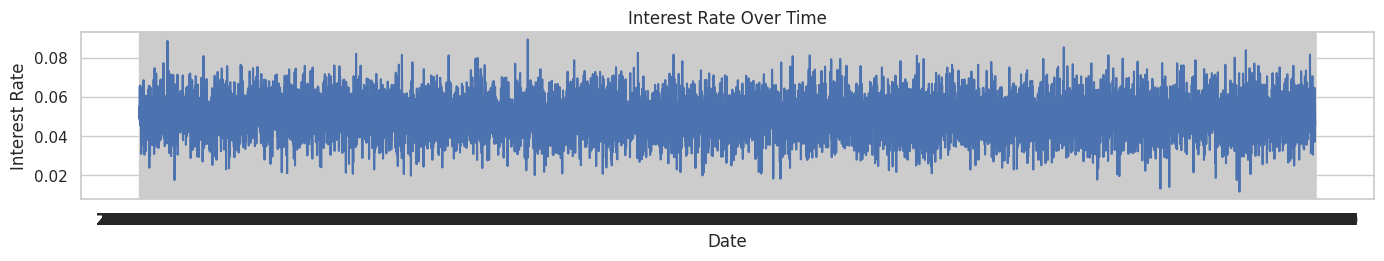

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series data
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Interest_Rate'], label='Interest Rate')
plt.title('Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.tight_layout()
plt.show()



In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Interest_Rate', 'Stock_Index', 'GDP_Growth']])

# Convert to sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # Number of days to look back
X, y = create_sequences(scaled_data, SEQ_LENGTH)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, X.shape[2])),
    Dense(3)  # Output layer for three features
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_history = lstm_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
219/219 [==============================] - 4s 13ms/step - loss: 0.0306 - val_loss: 0.0164
Epoch 2/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0161 - val_loss: 0.0164
Epoch 3/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0161 - val_loss: 0.0163
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0160 - val_loss: 0.0162
Epoch 5/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0160 - val_loss: 0.0162
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0160 - val_loss: 0.0163
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 8/10
219/219 [==============================] - 3s 16ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 9/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 10/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0158 - val_lo

In [8]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(SEQ_LENGTH, X.shape[2])),
    Dense(3)  # Output layer for three features
])

gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU model
gru_history = gru_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
219/219 [==============================] - 6s 22ms/step - loss: 0.0245 - val_loss: 0.0168
Epoch 2/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0160 - val_loss: 0.0164
Epoch 3/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 5/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 6/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0158 - val_loss: 0.0161
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0158 - val_loss: 0.0161
Epoch 8/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0158 - val_loss: 0.0161
Epoch 9/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0158 - val_loss: 0.0162
Epoch 10/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0158 - val_lo

In [9]:
from tensorflow.keras.layers import Bidirectional

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, X.shape[2]))),
    Dense(3)  # Output layer for three features
])

bilstm_model.compile(optimizer='adam', loss='mse')

# Train the BiLSTM model
bilstm_history = bilstm_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
219/219 [==============================] - 7s 21ms/step - loss: 0.0246 - val_loss: 0.0162
Epoch 2/10
219/219 [==============================] - 6s 25ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 3/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0160 - val_loss: 0.0161
Epoch 4/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 5/10
219/219 [==============================] - 6s 26ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 6/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 8/10
219/219 [==============================] - 6s 26ms/step - loss: 0.0158 - val_loss: 0.0163
Epoch 9/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0158 - val_loss: 0.0162
Epoch 10/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0159 - val_lo

In [10]:
# Evaluate models
lstm_loss = lstm_model.evaluate(X, y)
gru_loss = gru_model.evaluate(X, y)
bilstm_loss = bilstm_model.evaluate(X, y)

print(f'LSTM Model Loss: {lstm_loss}')
print(f'GRU Model Loss: {gru_loss}')
print(f'BiLSTM Model Loss: {bilstm_loss}')


273/273 [==============================] - 2s 6ms/step - loss: 0.0161
LSTM Model Loss: 0.016008006408810616
GRU Model Loss: 0.015731481835246086
BiLSTM Model Loss: 0.016066167503595352
